<a href="https://colab.research.google.com/github/sujitojha1/EVA4/blob/rev3/S10/EVA4_S10_Solution_V4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement EVA 4, Session10 : CIFAR 10

**Target**: 


*   Make sure  to Add CutOut to your code. It should come from your transformations (albumentations)
*   Use this repo: https://github.com/davidtvs/pytorch-lr-finder (Links to an external site.) 
  *  Move LR Finder code to your modules
  *  Implement LR Finder (for SGD, not for ADAM)
  *  Implement ReduceLROnPlatea: https://pytorch.org/docs/stable/optim.html#torch.optim.lr_scheduler.ReduceLROnPlateau (Links to an external site.)
*   Find best LR to train your model
*   Use SDG with Momentum
*   Train for 50 Epochs. 
*   Show Training and Test Accuracy curves
*   Target Accuracy is 88%
*   Run GradCAM on the any 25 misclassified images. Make sure you mention what is the prediction and what was the ground truth label.
*   Submit answers to S10-Assignment-Solution. 

**Results**

*  Total Parameters = 11,173,962
*  After 50 Epochs, Final Train Accuracy = 95.13%
*  After 50 Epochs, Final Test Accuracy = 92.65%

**Analysis**

*  Target accuracy > 88% using Reset18 architecture. Model performance is good as train and test accuracy is small.

## 1. Loading Module and Models 

In [1]:
# Future print function
from __future__ import print_function

# Load modules/models from EVA course
!rm -rf EVA4
!git clone -b rev3 https://github.com/sujitojha1/EVA4 -q --quiet
print("Loaded EVA4 Modules and Models")

# Installing latest Albumentation library
!pip install -U git+https://github.com/albu/albumentations -q --quiet
#pip install apex -q

# For inline matplotlib plotting
%matplotlib inline

Loaded EVA4 Modules and Models
     |████████████████████████████████| 634kB 15.1MB/s 



## 2. Loading train and test data with transforms and loader functions

In [2]:
from EVA4.Modules import *

# Loading test and train data & dataloader
cifar10 = dataset_cifar10(batch_size=128)

# Train dataloader
trainloader = cifar10.loader(train_flag=True)

# Test dataloader
testloader = cifar10.loader(train_flag=False)

classes = cifar10.classes

  pip install torch-lr-finder -v --global-option="amp"


CUDA availability ? True


Extracting ./Data/cifar-10-python.tar.gz to ./Data
Files already downloaded and verified


## 3. Exploratory Data Analysis

### 3.1 Summary Statistics

In [3]:
cifar10.data_summary_stats()
#print(vars(train))

Files already downloaded and verified
Files already downloaded and verified
(60000, 32, 32, 3)
[0.49186878 0.48265391 0.44717728]
[0.24697121 0.24338894 0.26159259]


### 3.2 Plotting sample images

Files already downloaded and verified


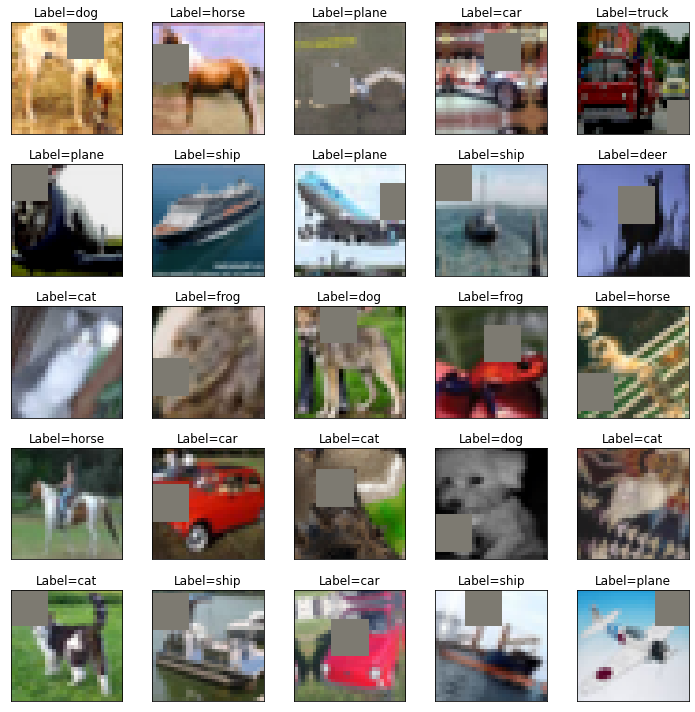

In [4]:
cifar10.sample_pictures(train_flag=True)

# The Model

In [5]:
from EVA4.Models import *

# Loading ResNet18 Model
net = ResNet18()

# Using cuda if available
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)

# Sending network to device
net = net.to(device)

cuda


# Model Summary

In [6]:
!pip install torchsummary
from torchsummary import summary

# Model Summary
summary(net, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1, 128,

# Define a Loss function and optimizer

Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()


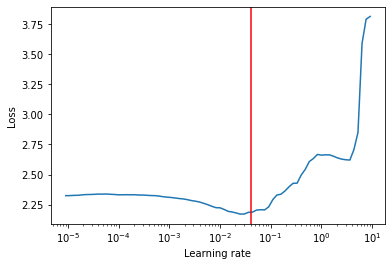

In [7]:
from EVA4.Modules import LRFinder
import torch.optim as optim

model = net
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=1e-6, weight_decay=1e-2,momentum=0.9)
lr_finder = LRFinder(model, optimizer, criterion, device="cuda")
lr_finder.range_test(trainloader, end_lr=100, num_iter=100)
lr_finder.plot(show_lr=0.040) # to inspect the loss-learning rate graph
lr_finder.reset() # to reset the model and optimizer to their initial stat

In [0]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.040, momentum=0.9)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'max',factor=0.5, patience=2, verbose=True)

# Training and Testing

In [9]:
# Load train and test model
from EVA4.Modules import *

train = train()
test = test()

for epoch in range(50):  # loop over the dataset multiple times

    train.execute(net, device, trainloader, optimizer, criterion, epoch)
    test.execute(net, device, testloader, criterion)
    scheduler.step(test.test_acc[-1])

print('Finished Training')

  0%|          | 0/391 [00:00<?, ?it/s]


Epoch: 0


Loss=1.3513543605804443 Batch_id=390 Accuracy=38.80: 100%|██████████| 391/391 [00:55<00:00,  7.05it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0111, Accuracy: 4992/10000 (49.92%)


Epoch: 1


Loss=0.8998934626579285 Batch_id=390 Accuracy=54.84: 100%|██████████| 391/391 [00:55<00:00,  6.99it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0095, Accuracy: 5839/10000 (58.39%)


Epoch: 2


Loss=0.8696252703666687 Batch_id=390 Accuracy=63.52: 100%|██████████| 391/391 [00:56<00:00,  6.92it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0068, Accuracy: 6960/10000 (69.60%)


Epoch: 3


Loss=1.0189411640167236 Batch_id=390 Accuracy=68.39: 100%|██████████| 391/391 [00:57<00:00,  6.84it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0066, Accuracy: 7199/10000 (71.99%)


Epoch: 4


Loss=0.9663307070732117 Batch_id=390 Accuracy=72.10: 100%|██████████| 391/391 [00:57<00:00,  6.86it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0053, Accuracy: 7694/10000 (76.94%)


Epoch: 5


Loss=0.7984602451324463 Batch_id=390 Accuracy=74.93: 100%|██████████| 391/391 [00:56<00:00,  6.86it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0049, Accuracy: 7888/10000 (78.88%)


Epoch: 6


Loss=0.5136604309082031 Batch_id=390 Accuracy=76.71: 100%|██████████| 391/391 [00:57<00:00,  6.83it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0043, Accuracy: 8159/10000 (81.59%)


Epoch: 7


Loss=0.8207141160964966 Batch_id=390 Accuracy=78.72: 100%|██████████| 391/391 [00:57<00:00,  6.85it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0039, Accuracy: 8330/10000 (83.30%)


Epoch: 8


Loss=0.838108241558075 Batch_id=390 Accuracy=79.61: 100%|██████████| 391/391 [00:57<00:00,  6.83it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0042, Accuracy: 8164/10000 (81.64%)


Epoch: 9


Loss=0.6298605799674988 Batch_id=390 Accuracy=80.74: 100%|██████████| 391/391 [00:57<00:00,  6.83it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0042, Accuracy: 8255/10000 (82.55%)


Epoch: 10


Loss=0.40313535928726196 Batch_id=390 Accuracy=81.69: 100%|██████████| 391/391 [00:57<00:00,  6.83it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 8491/10000 (84.91%)


Epoch: 11


Loss=0.49325284361839294 Batch_id=390 Accuracy=82.74: 100%|██████████| 391/391 [00:57<00:00,  6.82it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0038, Accuracy: 8420/10000 (84.20%)


Epoch: 12


Loss=0.5059579610824585 Batch_id=390 Accuracy=83.45: 100%|██████████| 391/391 [00:57<00:00,  6.84it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0037, Accuracy: 8409/10000 (84.09%)


Epoch: 13


Loss=0.4516846537590027 Batch_id=390 Accuracy=84.25: 100%|██████████| 391/391 [00:57<00:00,  6.85it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0029, Accuracy: 8762/10000 (87.62%)


Epoch: 14


Loss=0.4301625192165375 Batch_id=390 Accuracy=84.92: 100%|██████████| 391/391 [00:57<00:00,  6.82it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0032, Accuracy: 8645/10000 (86.45%)


Epoch: 15


Loss=0.5906804800033569 Batch_id=390 Accuracy=85.71: 100%|██████████| 391/391 [00:57<00:00,  6.85it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0030, Accuracy: 8732/10000 (87.32%)


Epoch: 16


Loss=0.5895875692367554 Batch_id=390 Accuracy=86.07: 100%|██████████| 391/391 [00:57<00:00,  6.84it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0031, Accuracy: 8665/10000 (86.65%)

Epoch    17: reducing learning rate of group 0 to 2.0000e-02.

Epoch: 17


Loss=0.3154863715171814 Batch_id=390 Accuracy=88.67: 100%|██████████| 391/391 [00:57<00:00,  6.84it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0025, Accuracy: 8916/10000 (89.16%)


Epoch: 18


Loss=0.2347729504108429 Batch_id=390 Accuracy=88.97: 100%|██████████| 391/391 [00:57<00:00,  6.83it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0025, Accuracy: 8949/10000 (89.49%)


Epoch: 19


Loss=0.30808621644973755 Batch_id=390 Accuracy=89.54: 100%|██████████| 391/391 [00:57<00:00,  6.85it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0025, Accuracy: 9003/10000 (90.03%)


Epoch: 20


Loss=0.388563871383667 Batch_id=390 Accuracy=89.78: 100%|██████████| 391/391 [00:57<00:00,  6.85it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0025, Accuracy: 8977/10000 (89.77%)


Epoch: 21


Loss=0.330339252948761 Batch_id=390 Accuracy=89.95: 100%|██████████| 391/391 [00:57<00:00,  6.80it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0027, Accuracy: 8901/10000 (89.01%)


Epoch: 22


Loss=0.19853322207927704 Batch_id=390 Accuracy=90.28: 100%|██████████| 391/391 [00:57<00:00,  6.85it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0025, Accuracy: 8979/10000 (89.79%)

Epoch    23: reducing learning rate of group 0 to 1.0000e-02.

Epoch: 23


Loss=0.18104858696460724 Batch_id=390 Accuracy=91.78: 100%|██████████| 391/391 [00:57<00:00,  6.84it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0021, Accuracy: 9105/10000 (91.05%)


Epoch: 24


Loss=0.3073502480983734 Batch_id=390 Accuracy=92.07: 100%|██████████| 391/391 [00:56<00:00,  6.87it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0021, Accuracy: 9141/10000 (91.41%)


Epoch: 25


Loss=0.22520634531974792 Batch_id=390 Accuracy=92.12: 100%|██████████| 391/391 [00:57<00:00,  6.86it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0022, Accuracy: 9119/10000 (91.19%)


Epoch: 26


Loss=0.24221205711364746 Batch_id=390 Accuracy=92.44: 100%|██████████| 391/391 [00:56<00:00,  6.86it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0022, Accuracy: 9130/10000 (91.30%)


Epoch: 27


Loss=0.199947327375412 Batch_id=390 Accuracy=92.53: 100%|██████████| 391/391 [00:56<00:00,  6.87it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0022, Accuracy: 9150/10000 (91.50%)


Epoch: 28


Loss=0.2571031451225281 Batch_id=390 Accuracy=92.58: 100%|██████████| 391/391 [00:57<00:00,  6.84it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0021, Accuracy: 9168/10000 (91.68%)


Epoch: 29


Loss=0.1854013055562973 Batch_id=390 Accuracy=92.66: 100%|██████████| 391/391 [00:57<00:00,  6.85it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0021, Accuracy: 9163/10000 (91.63%)


Epoch: 30


Loss=0.15015923976898193 Batch_id=390 Accuracy=92.88: 100%|██████████| 391/391 [00:57<00:00,  6.80it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0021, Accuracy: 9157/10000 (91.57%)


Epoch: 31


Loss=0.1531313955783844 Batch_id=390 Accuracy=93.09: 100%|██████████| 391/391 [00:57<00:00,  6.80it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0023, Accuracy: 9109/10000 (91.09%)

Epoch    32: reducing learning rate of group 0 to 5.0000e-03.

Epoch: 32


Loss=0.2117411196231842 Batch_id=390 Accuracy=93.53: 100%|██████████| 391/391 [00:57<00:00,  6.82it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0021, Accuracy: 9155/10000 (91.55%)


Epoch: 33


Loss=0.15264873206615448 Batch_id=390 Accuracy=93.74: 100%|██████████| 391/391 [00:57<00:00,  6.81it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0020, Accuracy: 9209/10000 (92.09%)


Epoch: 34


Loss=0.05551619082689285 Batch_id=390 Accuracy=93.88: 100%|██████████| 391/391 [00:57<00:00,  6.79it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0021, Accuracy: 9208/10000 (92.08%)


Epoch: 35


Loss=0.13812002539634705 Batch_id=390 Accuracy=93.94: 100%|██████████| 391/391 [00:57<00:00,  6.79it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0021, Accuracy: 9189/10000 (91.89%)


Epoch: 36


Loss=0.17378367483615875 Batch_id=390 Accuracy=94.14: 100%|██████████| 391/391 [00:57<00:00,  6.77it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0021, Accuracy: 9204/10000 (92.04%)

Epoch    37: reducing learning rate of group 0 to 2.5000e-03.

Epoch: 37


Loss=0.09793592244386673 Batch_id=390 Accuracy=94.50: 100%|██████████| 391/391 [00:57<00:00,  6.76it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0020, Accuracy: 9226/10000 (92.26%)


Epoch: 38


Loss=0.11078695207834244 Batch_id=390 Accuracy=94.47: 100%|██████████| 391/391 [00:57<00:00,  6.75it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0020, Accuracy: 9238/10000 (92.38%)


Epoch: 39


Loss=0.18230955302715302 Batch_id=390 Accuracy=94.78: 100%|██████████| 391/391 [00:58<00:00,  6.73it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0020, Accuracy: 9239/10000 (92.39%)


Epoch: 40


Loss=0.1153460144996643 Batch_id=390 Accuracy=94.63: 100%|██████████| 391/391 [00:58<00:00,  6.72it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0020, Accuracy: 9241/10000 (92.41%)


Epoch: 41


Loss=0.12234995514154434 Batch_id=390 Accuracy=94.84: 100%|██████████| 391/391 [00:58<00:00,  6.72it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0021, Accuracy: 9241/10000 (92.41%)


Epoch: 42


Loss=0.13673268258571625 Batch_id=390 Accuracy=94.55: 100%|██████████| 391/391 [00:58<00:00,  6.72it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0021, Accuracy: 9245/10000 (92.45%)


Epoch: 43


Loss=0.2276216447353363 Batch_id=390 Accuracy=94.78: 100%|██████████| 391/391 [00:57<00:00,  6.75it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0020, Accuracy: 9227/10000 (92.27%)


Epoch: 44


Loss=0.1534605473279953 Batch_id=390 Accuracy=94.75: 100%|██████████| 391/391 [00:57<00:00,  6.77it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0021, Accuracy: 9245/10000 (92.45%)


Epoch: 45


Loss=0.16617222130298615 Batch_id=390 Accuracy=94.76: 100%|██████████| 391/391 [00:57<00:00,  6.78it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0020, Accuracy: 9262/10000 (92.62%)


Epoch: 46


Loss=0.17353728413581848 Batch_id=390 Accuracy=94.97: 100%|██████████| 391/391 [00:57<00:00,  6.77it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0021, Accuracy: 9241/10000 (92.41%)


Epoch: 47


Loss=0.13083039224147797 Batch_id=390 Accuracy=94.85: 100%|██████████| 391/391 [00:57<00:00,  6.75it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0021, Accuracy: 9235/10000 (92.35%)


Epoch: 48


Loss=0.11058435589075089 Batch_id=390 Accuracy=95.03: 100%|██████████| 391/391 [00:57<00:00,  6.77it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0021, Accuracy: 9239/10000 (92.39%)

Epoch    49: reducing learning rate of group 0 to 1.2500e-03.

Epoch: 49


Loss=0.0824049711227417 Batch_id=390 Accuracy=95.13: 100%|██████████| 391/391 [00:57<00:00,  6.75it/s]



Test set: Average loss: 0.0020, Accuracy: 9265/10000 (92.65%)

Finished Training


# Misclassified images


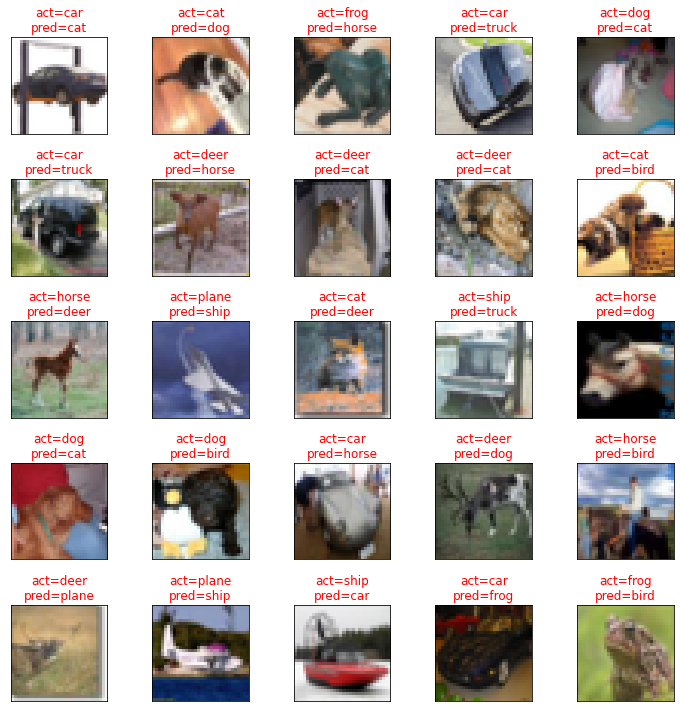

In [10]:
plot_misclassified_images(net,device,testloader,classes)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2416: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


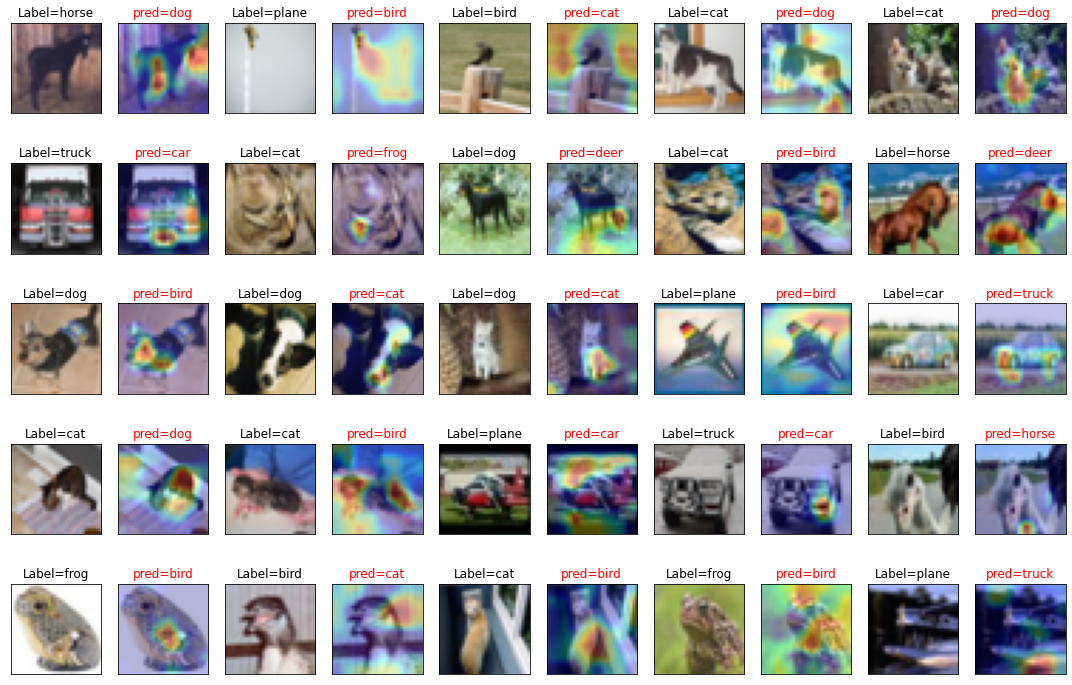

In [11]:
plot_misclassified_images_w_gradcam(net,device,testloader,classes)

# Plotting Train & Test Accuracy/Losses

# Evaluating test Accuracy over different classes 

In [12]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images,labels = images.to(device),labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 92 %
Accuracy of   car : 94 %
Accuracy of  bird : 90 %
Accuracy of   cat : 85 %
Accuracy of  deer : 93 %
Accuracy of   dog : 88 %
Accuracy of  frog : 93 %
Accuracy of horse : 96 %
Accuracy of  ship : 90 %
Accuracy of truck : 95 %


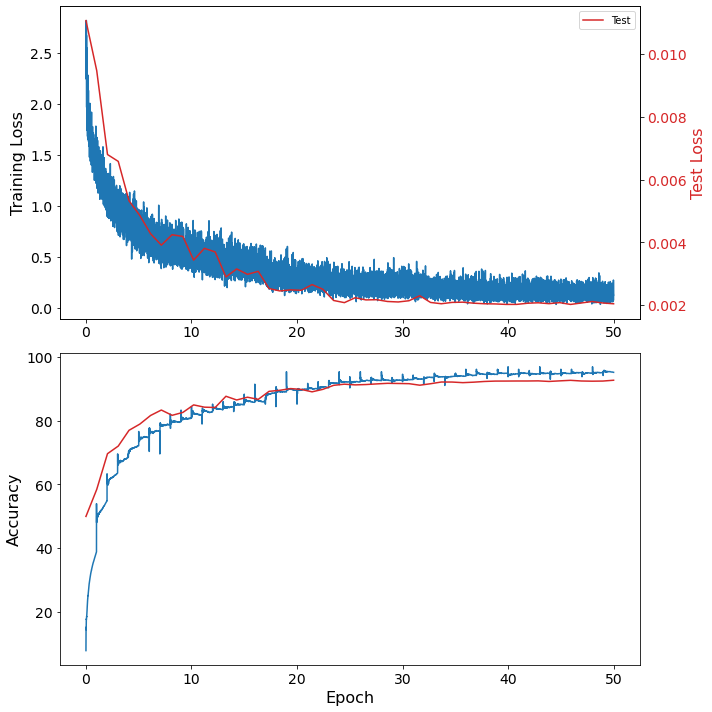

In [13]:
plot_train_test_acc_loss(train,test)